In [1]:
import h5py
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
import numpy as np
from enum import Enum
import collections


%matplotlib inline


class FIELD(Enum):
        DOSE_FAR = [1,['dosefar_0']]

                    
def loadData(filePath):           
        f = h5py.File(filePath, 'r')
        allData = collections.defaultdict(lambda: np.ndarray(0))
        for fld in FIELD:
                VAR0_name = 'vars/'+fld.value[1][0]
                SHAPE = f[VAR0_name].shape            
                Lx=SHAPE[0]
                Ly=SHAPE[1]
                Lz=SHAPE[2]
                data = np.zeros([Lx, Ly, Lz,  1])
                idx = 0
                for field in fld.value[1]:
                    VAR_name = 'vars/'+field
                    data[...,idx] = f[VAR_name][...]
                    idx += 1
                    allData[fld] = data                   
        f.close()
        return allData
    
    
        


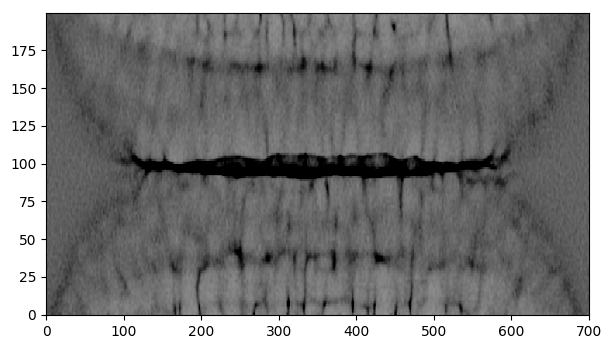

In [4]:

filePath = '../KAP/test_out/'
fileName = 'proto_1.h5'
DATA0 = loadData(filePath+fileName)

data2Plt = DATA0[FIELD.DOSE_FAR][...,0,0]

fig, ax = plt.subplots(1,1, figsize = [7, 4], dpi = 100) 

sg = 1
data2Plt = ndimage.gaussian_filter(data2Plt, sigma=(sg,sg), order=0)

vmax = 20
im = ax.imshow( np.transpose(data2Plt),aspect='auto',origin = 'lower', 
               interpolation="nearest", vmin = -vmax, vmax = vmax, cmap='Greys')


 
